In [44]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')

from Ltif import Lpicday, Lpic
from sklearn import datasets, metrics, svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import dump, load

In [52]:
df = Lpicday('23_12_08').clusters_day(min_size = 80)
cl = [val for bal in list(df['cluster']) for val in bal if len(val) > 0]

100%|██████████| 200/200 [00:07<00:00, 26.52it/s]


In [46]:
len(cl)

230

KeyboardInterrupt: 

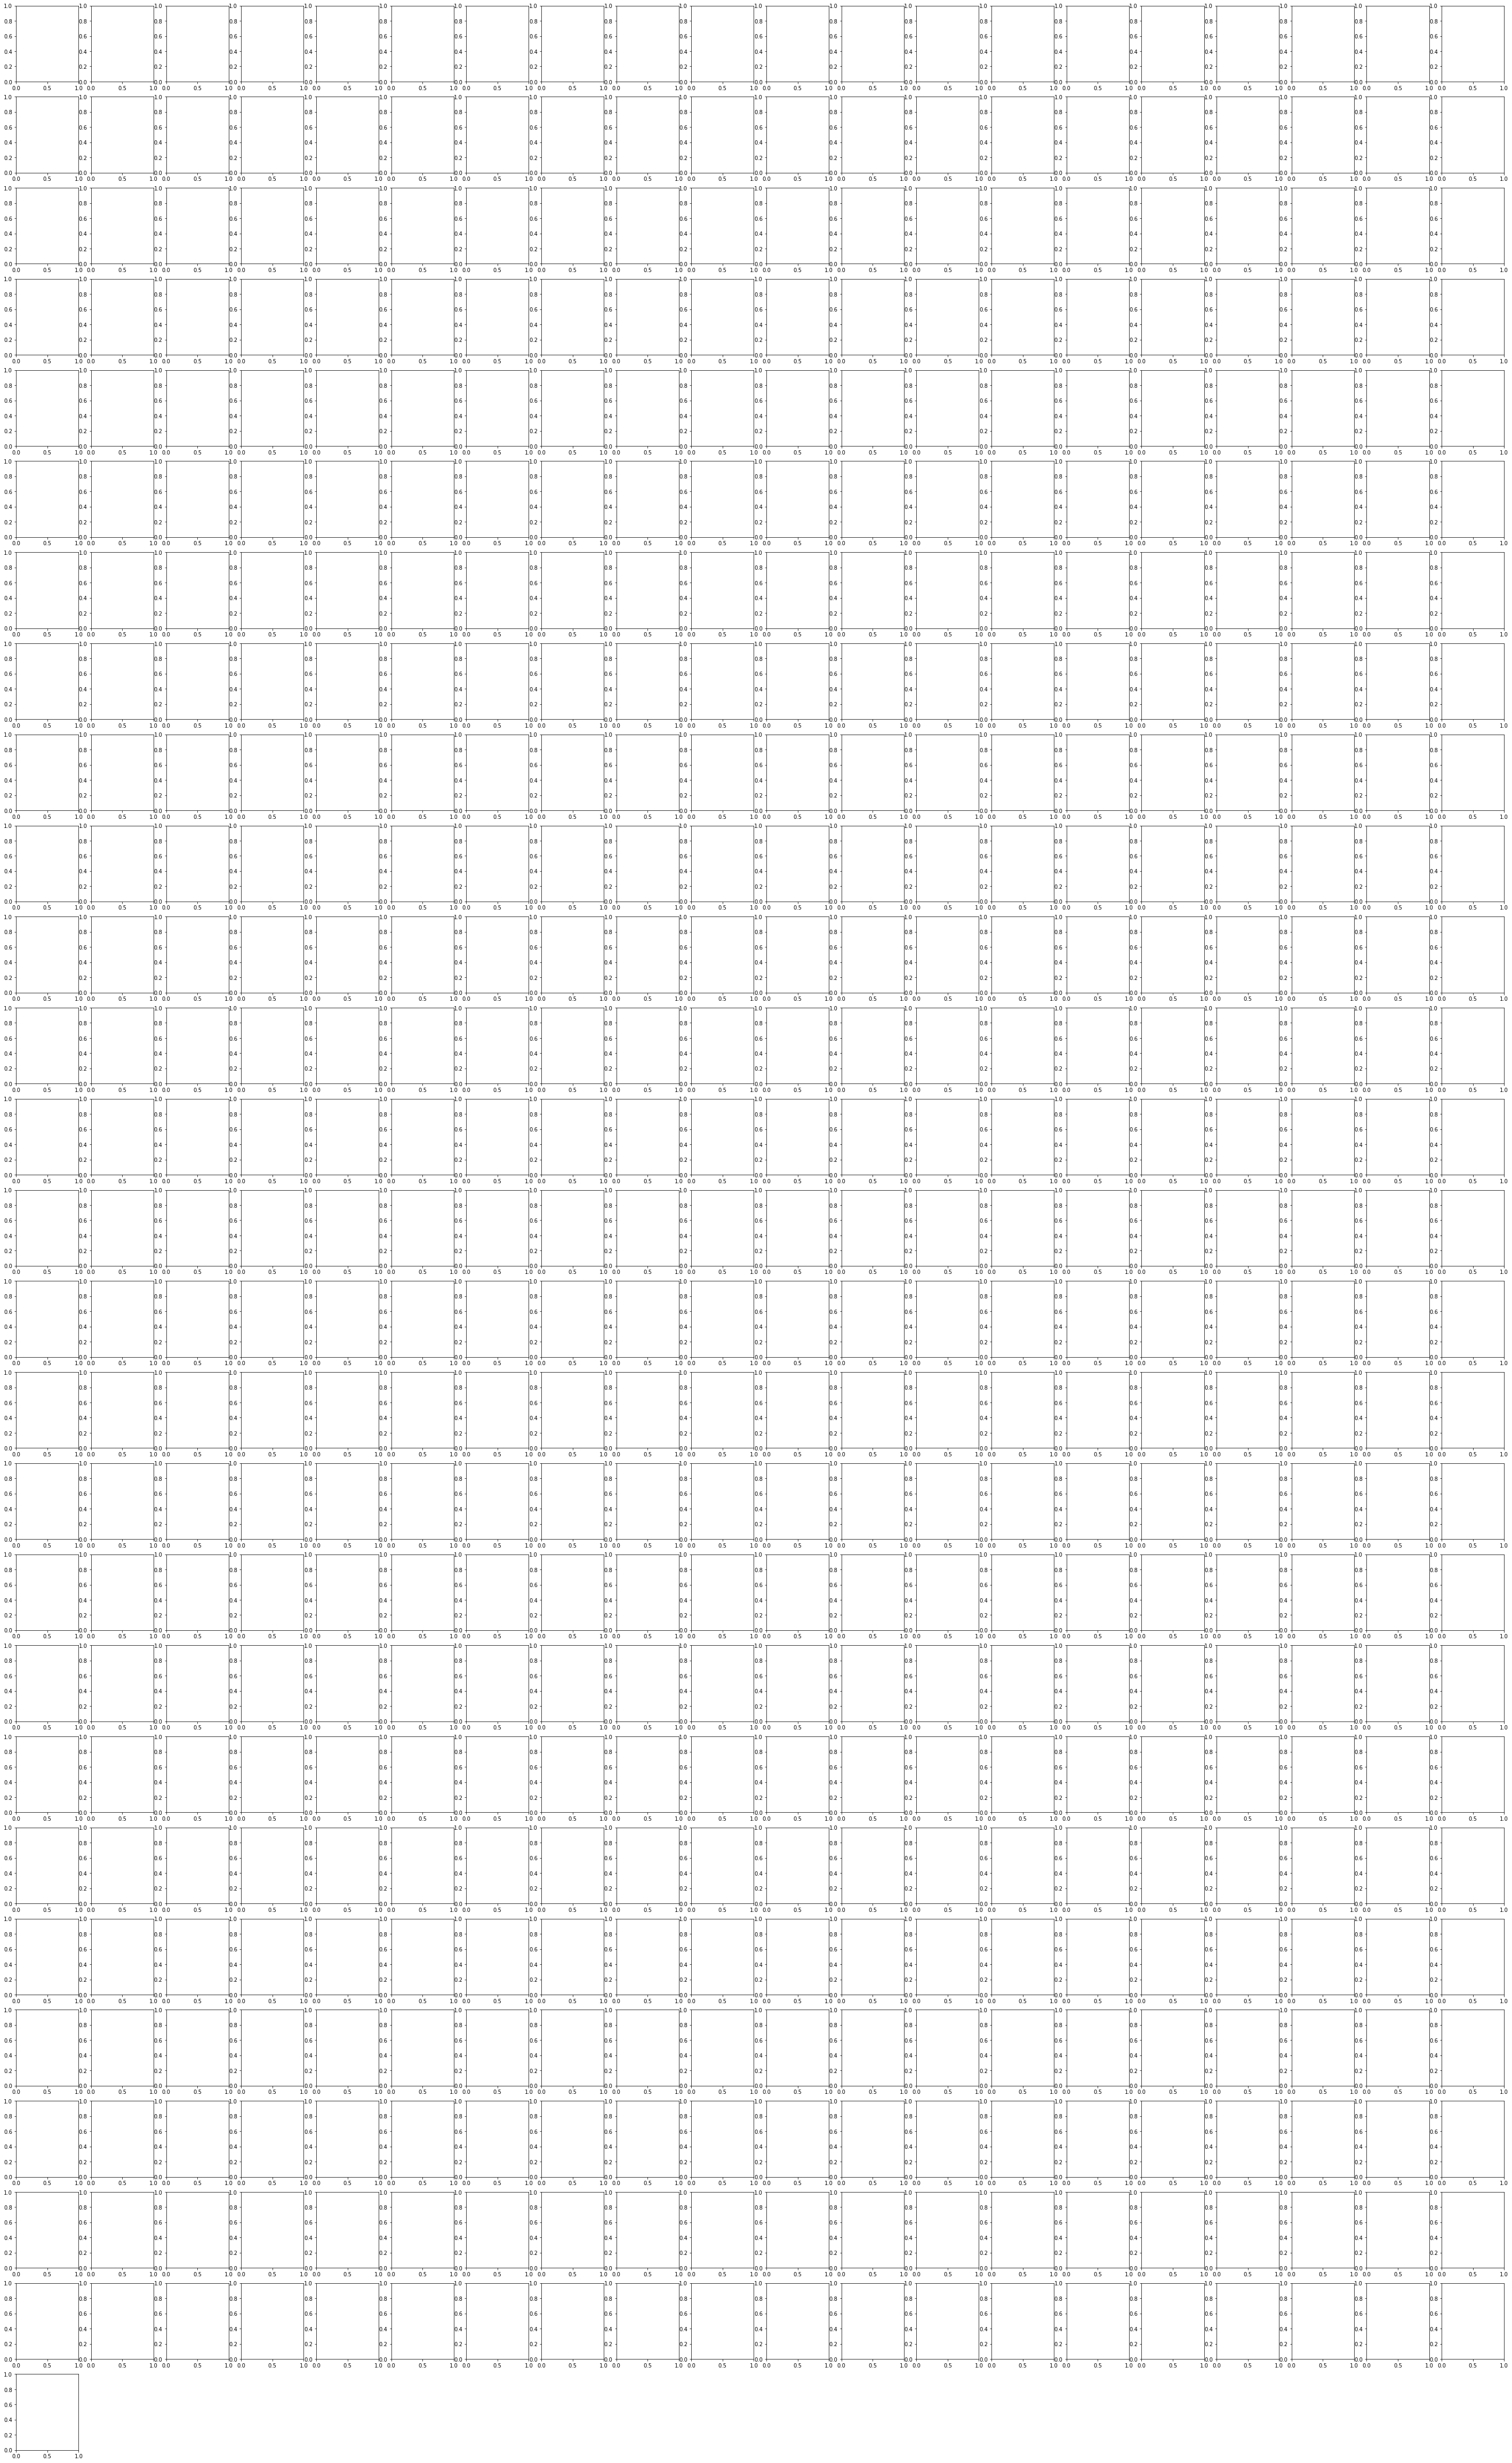

In [43]:
rows, cols = 32, 20

_, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (50,100))


for i in range(rows):
    for ax, image, label in zip(axes[i], cl[cols * i:], list(range(0,230))[cols * i:]):
        ax.set_axis_off()
        ax.imshow(image, interpolation = 'nearest')
        ax.set_title('Cluster index: %i' % label)

In [47]:
target = np.array([1,1,1,2,1,1,1,1,1,1,2,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,
                  1,1,1,2,1,2,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,1,2,2,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,3,
                  1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,
                  2,1,2,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,2,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,2,1,5,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,2,1,2,2,1,1,1,1,2,2,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,2,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,
                  1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,
                  1,2,1,1,3,2,2,1,2,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,2,
                  1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,2,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,2,
                  1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1])

target = [val if val < 3 else 2 for val in target]

In [54]:
cl = [val for bal in list(df['cluster']) for val in bal if len(val) > 0]

max_h, max_w = 53, 42

for item in [val for bal in cl for val in bal]:
    while len(item) < max_w:
        item += [0]

for item in cl:
    while len(item) < max_h:
        item += [[0] * max_w]
        
ac = np.array(cl)

data = ac.reshape(621, -1)

In [58]:
clf = load('/eos/user/l/lkoller/ML models/clust_num_v4.txt')

In [59]:
predicted = clf.predict(data)

In [60]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(target, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       523
           2       1.00      0.80      0.89        98

    accuracy                           0.97       621
   macro avg       0.98      0.90      0.93       621
weighted avg       0.97      0.97      0.97       621




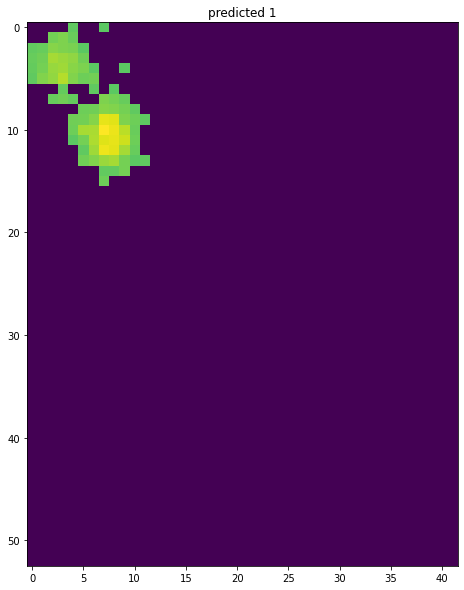

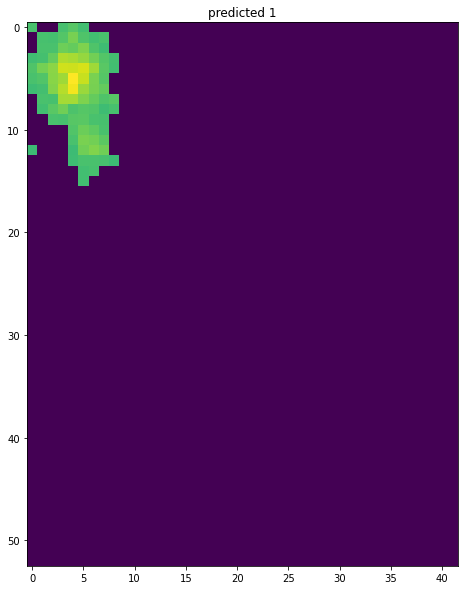

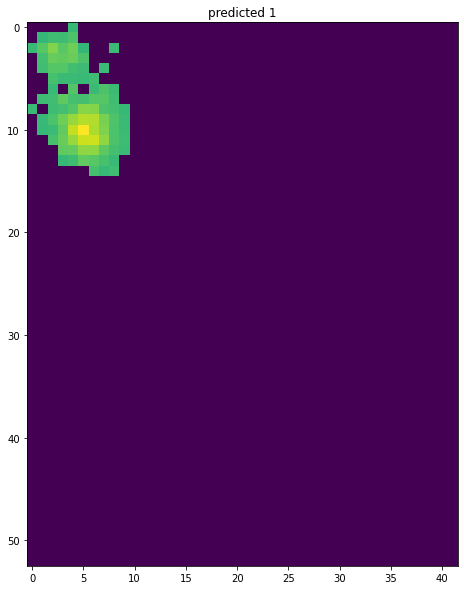

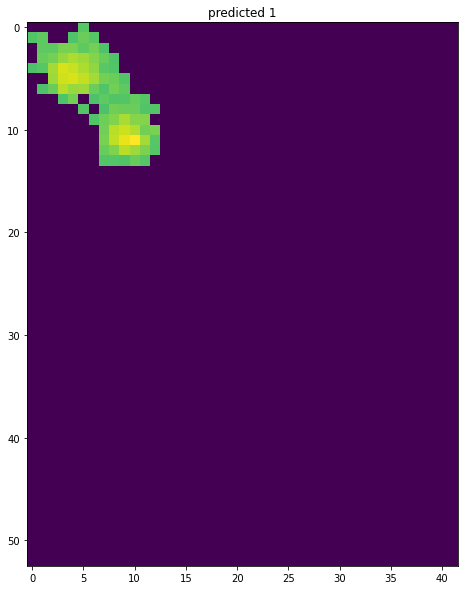

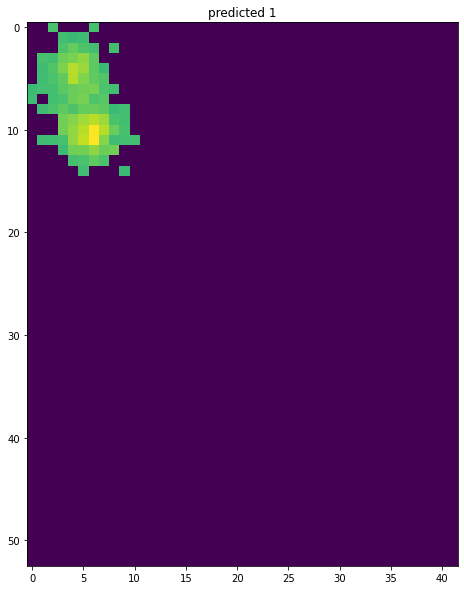

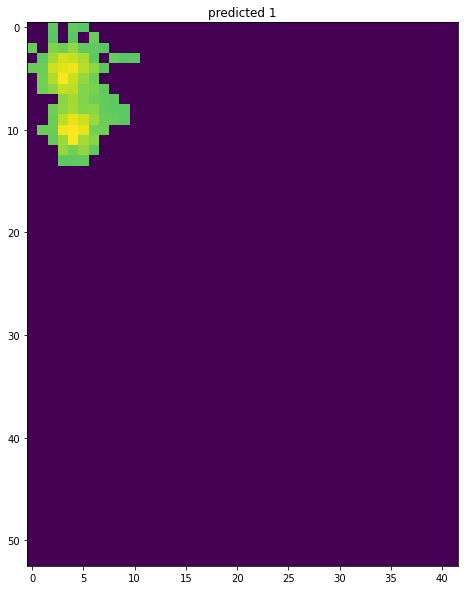

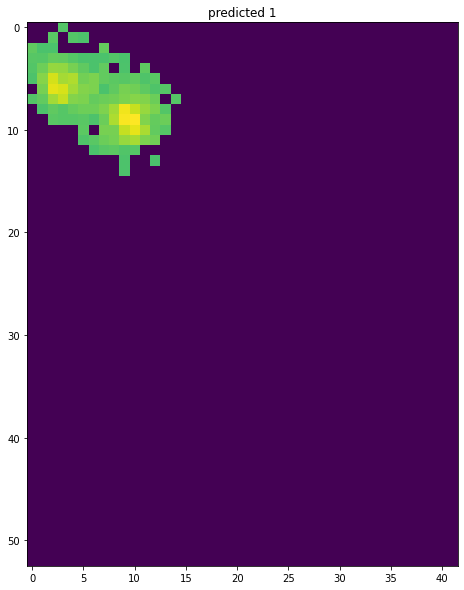

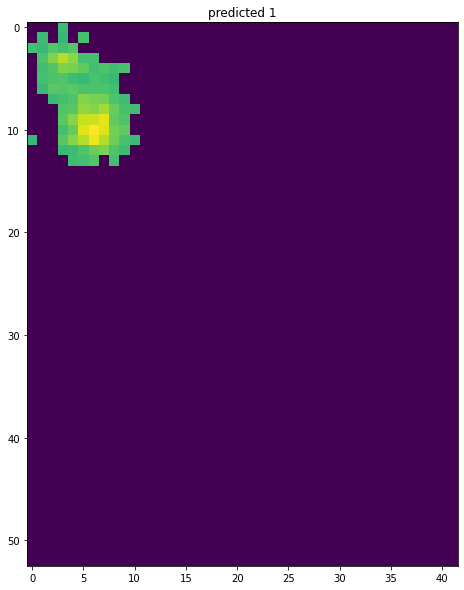

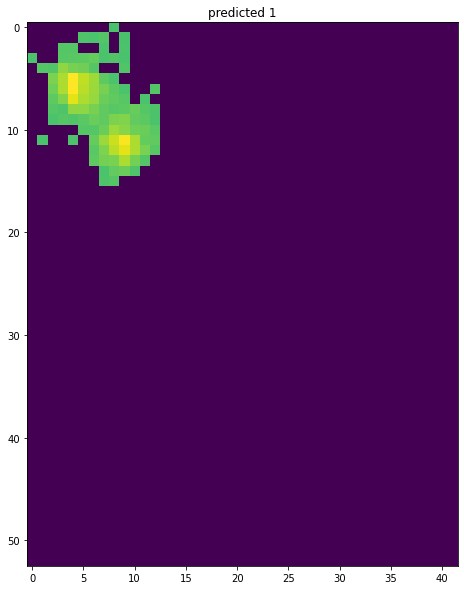

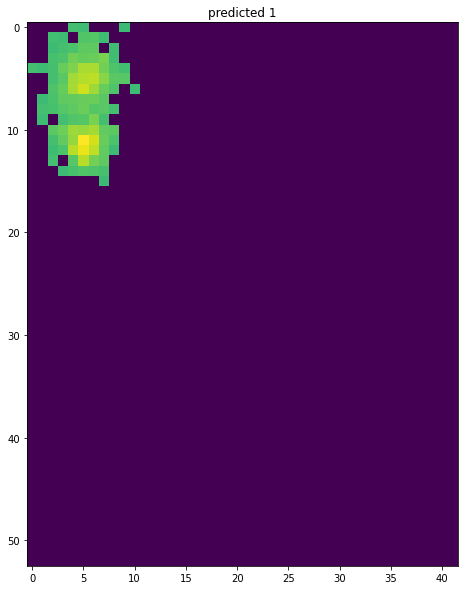

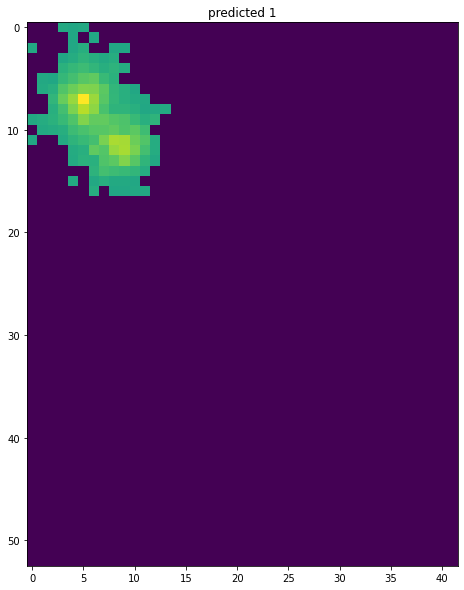

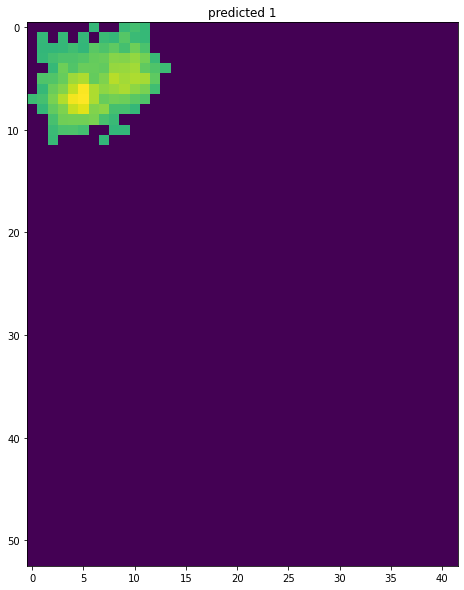

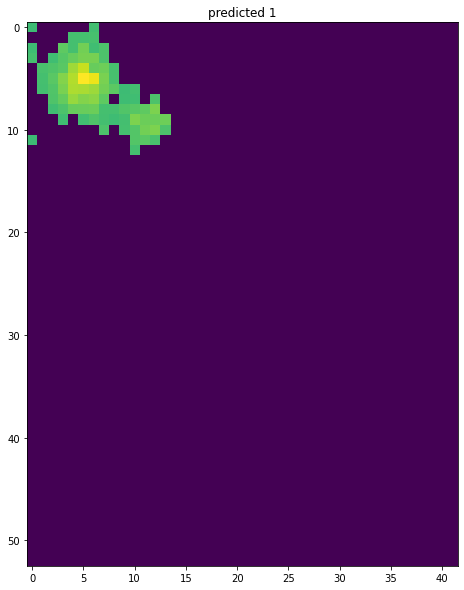

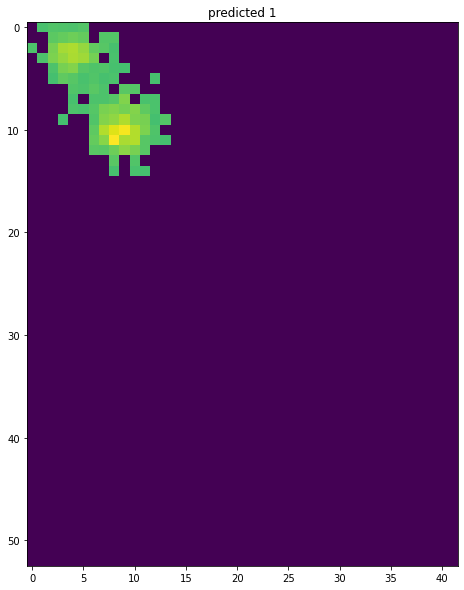

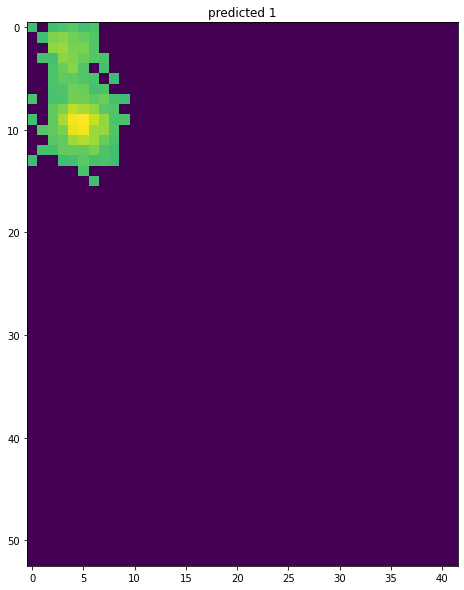

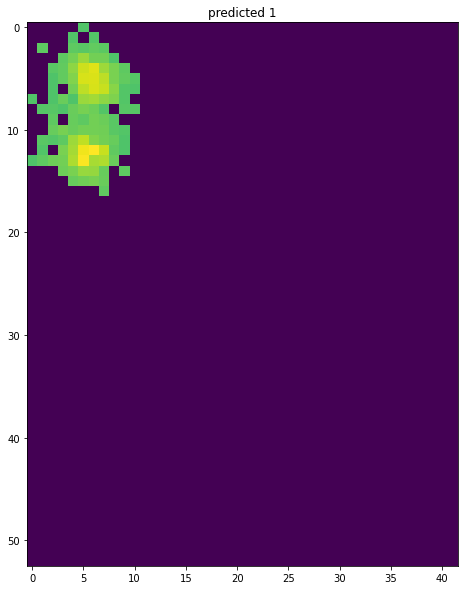

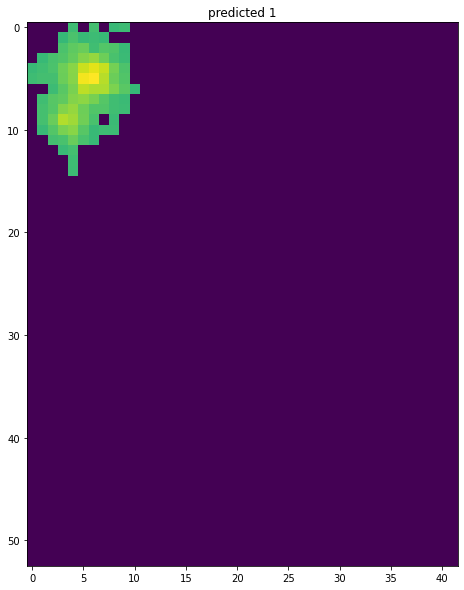

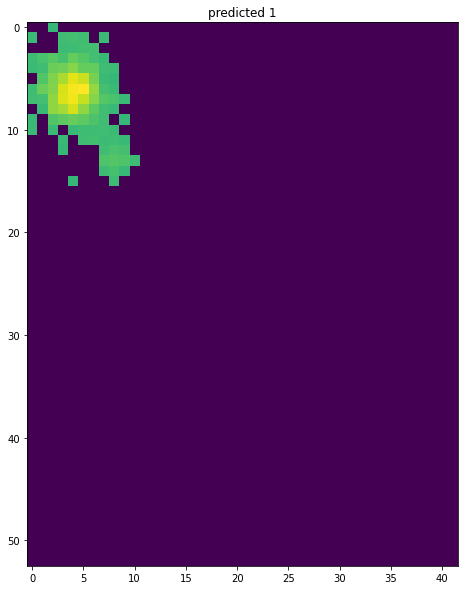

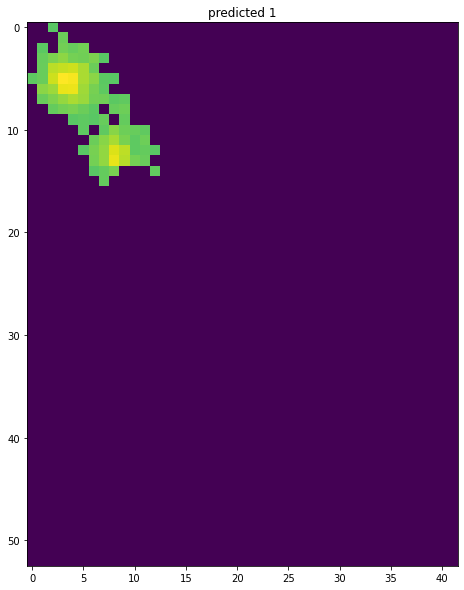

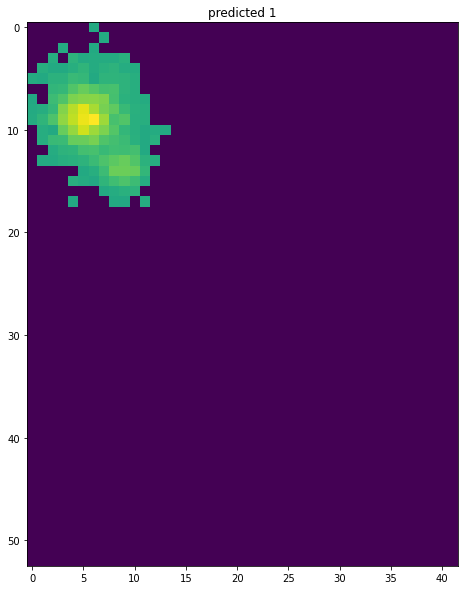

In [61]:
ind = [val[0] for val in list(enumerate(predicted == target)) if val[1] == False]
for i in ind:
    plt.figure(figsize = (10,10))
    plt.imshow(cl[i])
    plt.title('predicted %i' % predicted[i])

In [ ]:
target = np.array([1,1,1,1,1,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,2,3,2,
                  1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,1,1,1,
                  1,1,1,4,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,2,1,1,2,1,1,2,1,1,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,2,2,1,
                  1,1,1,2,2,1,1,1,1,1,2,1,2,1,1,2,1,1,1,1,1,1,1,1,2,2,2,1,1,1,2,1,2,1,2,1,1,1,1,2,
                  2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,2,1,1,2,1,1,2,1,1,1,1,1,2,2,1,
                  1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,3,1,2,
                  1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,
                  1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,2,1,1,1,1,
                  1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,3,2,1,1,1,1,1,1,1,1,1,1,
                  1,1,2,1,1,1,1,1,2,3,1,1,1,1,1,1,2,1,1,2,1,2,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,
                  1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,
                  1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,3,2,1,1,1,1,
                  1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,])